# IMDB Dataset

The IMDB Dataset consists of 50,000 reviews from the INternet Movie Database. They're are split into 25,000 for training and 25,000 for testing. Each set consists of 50% positive and 50% negative reviews.

## Loading the Dataset
We will only keep the top 10,000 words. Exclusing rare words makes the vector size more managable.

In [9]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [27]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Because we can, here's how to decode the the reviews back into English:

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Preparing the Data
We can't feed a list of integers into a neural network. We have to turn the lists into tensors. There are two ways to do this:

- Pad the lists so they are all the same length, turning them into an integer tensor and then having a first layer that can handle such tensors (the Embedding tensor).
- One-hot encode the lists.

We will do the latter. We will do this manually for clarity.

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## Building the Model
Our model will consist of two hidden Dense layers with 16 units each, activated by the ReLU function. The output layer will contain a single unit activated by the Sigmoid function, giving a probability whether the review is positive or negative.

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Because our output is a binary probability, it is best to use the `binary_crossentropy` loss function. Crossentropy is usually the best choice when dealing with probabilities: it's from the field of Information Theory and measures the the distance between two probability distributions or, in our case, between the ground-truth distribution and our predictions.

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Validating our Approach
In order to monitor during training we need to set aside a validation set.


In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.5042 - acc: 0.7885 - val_loss: 0.3773 - val_acc: 0.8707
Epoch 2/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.2989 - acc: 0.9051 - val_loss: 0.3002 - val_acc: 0.8898
Epoch 3/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.2172 - acc: 0.9283 - val_loss: 0.3090 - val_acc: 0.8712
Epoch 4/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.1744 - acc: 0.9435 - val_loss: 0.2822 - val_acc: 0.8847
Epoch 5/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1419 - acc: 0.9543 - val_loss: 0.2857 - val_acc: 0.8856
Epoch 6/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1146 - acc: 0.9653 - val_loss: 0.3150 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.0977 - acc: 0.9710 - val_loss: 0.3132 - 

`model.fit()` returns a `History` object, which has a `history` member, which is a dictionary containing data about everything that happened during training.

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

We can use Matplotlib to plot the training and validation loss, as well as the training and validation accuracy side-by-side.

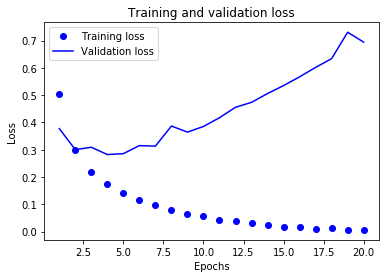

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

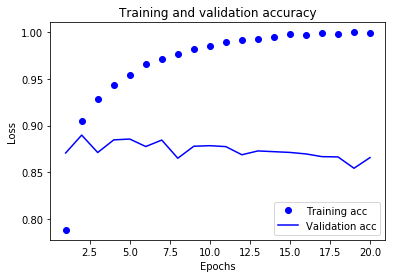

In [23]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Our model is overfitting. The Validation loss is minimised around 4 epochs, so lets create a new network and only train it for 4 epochs.

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 3s 136us/step - loss: 0.4467 - acc: 0.8241
Epoch 2/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.2556 - acc: 0.9101
Epoch 3/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.1969 - acc: 0.9303
Epoch 4/4
25000/25000 [==============================] - 3s 125us/step


[0.317343113527298, 0.875]

## Using a trained network to generate predictions on new data
After having trained the network, we want to use it in a practical setting. We can generate the likelyhood of reviews being positive by using the `predict` method.

In [29]:
model.predict(x_test)

array([[0.29527253],
       [0.9996854 ],
       [0.93913096],
       ...,
       [0.1644207 ],
       [0.1573649 ],
       [0.7589131 ]], dtype=float32)